#  Titanic Data Set
#### Hila Dar, Sep 2021

#### TOC:

## TOC:
1. [Introduction](#Introduction)

    1.1 [Problem definition](#1.1)
    
    1.2 [Dataset](#1.2)
    
    1.3 [Libraries](#1.3)
    
    1.4 [Loading the Data](#1.4)
    
    
2. [Data Analysis and Data Visualization](#Data_Analysis_and_Data_Visualization)

    2.1 [Simple Data Analysis](#2.1)
    
    2.2 [Analyze by visualizing data](#2.2)
    
    2.3
    
- what kind of plots, explints. 
- dist of features, joint dist of features & joint feature+ylabel
- conculstion. 

3. **Preprocessing**
- missing values. 
- normlization
- ylabel ==> how to do? what kind of problem is this?
- unbalnaced (if its classfication)

4. **Feature creation / selection**

5. **Model**

## 1. Introducation  <a class="anchor" id="Introduction"></a>
### 1.1 Historical Backgroud
The sinking of the Titanic is one of the most infamous shipwrecks in history.

Titanic was a British passenger liner that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City.
Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
The Titanic carried some of the wealthiest people in the world, as well as hundreds of emigrants who were seeking a new life in the United States. 

The first-class accommodation was designed to be the pinnacle of comfort and luxury, with a gymnasium, swimming pool, libraries, high-class restaurants, and opulent cabins
Second class were often professors or authors.
third class accommodation was basic. Cabins slept up to 10 people and were located at the noisy bottom part of the ship close to the engines. 

Sinking
The carried lifeboats were enough for 1,178 people—about half the number on board. A disproportionate number of men were left aboard because of a "women and children first" protocol for loading lifeboats.
When the ship sank, All remaining passengers and crew were immersed in lethally cold water with a temperature of −2 °C and almost all of those in the water died in a minutes.

although there were no physical barriers preventing Third Class women and children passengers from reaching the boats. a small rowing boat in the middle of the Atlantic on a dark night, and some did not want to leave their husbands.
Harbinson thought that much of the reason why a smaller percentage of Third Class women and children were saved than First and Second Class women and children stemmed from a lack of guidance for Third Class passengers. Despite Hart’s evidence, Harbinson thought that the organisation of stewards to take Third Class up to the boat deck could have been greatly improved, especially given that many in Third Class would be unused to travelling on ships and would find it hard to make their way to the boat deck. He also thought that passengers ought to have been informed that the ship was sinking by some general alarm, which he said, despite suggestions that this would have caused a panic, was something they had a right to know and would have given them a better sense of the need to get to the boat deck as quickly as possible.
No-one can argue with these sentiments; and the fact that lifeboats went away with empty places in them, when elsewhere on the ship others wished to fill those places, can only be put down to poor organization, despite the need to avoid a panic.


The figures show stark differences in the survival rates of the different classes aboard Titanic. Although only 3% of first-class women were lost, 54% of those in third-class died. Similarly, five of six first-class and all second-class children survived, but 52 of the 79 in third-class perished. The differences by gender were even bigger: nearly all female crew members, first- and second-class passengers were saved. Men from the First Class died at a higher rate than women from the Third Class. In total, 50% of the children survived, 20% of the men and 75% of the women.
Titanic's maiden voyage began on Wednesday, 10 April 1912. Following the embarkation of the crew, the passengers began arriving at 9:30 am.
920 passengers boarded Titanic at Southampton – 179 First Class, 247 Second Class, and 494 Third Class. Additional passengers were to be picked up at Cherbourg and Queenstown.
</u>

### 1.2 Problem definition <a class="anchor" id="1.2"></a>
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

What sorts of people were more likely to survive the Titanic sinking?
Use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.

### 1.3 Dataset <a class="anchor" id="1.3"></a>
contains only passengers, not crew.
The data has been split into two groups:
(1) train.csv 
(2) test.csv
train.csv contains the details of a subset of the passengers on board (891 passengers).
Using the patterns you find in train.csv, you have to predict whether the other 418 passengers on board (in test.csv) survived.

Attribute Information:
1.PassengerId
2.Survived - If it's a "1", the passenger survived, if it's a "0", the passenger died.
3.Pclass
4.Name
5.Sex
6.Age
7.SibSp
8.Parch
9.Ticket
10.Fare
11.Cabin
12.Embarked

The values in the second column ("Survived") can be used to determine whether each passenger survived or not:


### 1.3 Libraries  <a class="anchor" id="1.3"></a>

In [73]:
import os

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set()

# split train and test:
from sklearn.model_selection import train_test_split

# machine learning
from scipy import stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

### 1.4 Loading the Data <a class="anchor" id="1.4"></a>

In [74]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("./Desktop/Data Science/Titanic Project/train.csv")
test_df = pd.read_csv("./Desktop/Data Science/Titanic Project/test.csv")

In [75]:
# Looking for duplicates in the dataset
train_df.duplicated().sum()

0

## 2. Exploratory data analysis & Data Visualization <a class="anchor" id="Data_Analysis_and_Data_Visualization"></a>


### 2.1 Simple Data Analysis <a class="anchor" id="2.1"></a>

In [1]:
train_df.head()

NameError: name 'train_df' is not defined

#### Data Dictionary

| Feature  | Description                                                          |
|----------|----------------------------------------------------------------------|
| Survival | Survival (0 = No; 1 = Yes)                                           |
| Pclass   | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)                          |
| Name     | Full name                                                            |
| Sex      | Sex                                                                  |
| Age      | Age                                                                  |
| Sibsp    | Number of Siblings/Spouses Aboard                                    |
| Parch    | Number of Parents/Children Aboard                                    |
| Ticket   | Ticket Number                                                        |
| Fare     | Passenger Fare                                                       |
| Cabin    | Cabin                                                                |
| Embarked | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) |

#### Which features are categorical? Which features are numerical?

In [77]:
categorial_features = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_features = train_df.select_dtypes(exclude=['object']).columns.tolist()
print(f'Categorical features:{categorial_features}')
print(f'Numerical features:{numerical_features}')

Categorical features:['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical features:['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


* Name column may contain errors or typos.

#### Which features contain blank, null or empty values?

In [78]:
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [79]:
test_df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

For $\frac{687}{891}\approx 77\%$ of the passengers from train_df, cabin informatation is missing, for $\frac{177}{891}\approx20\%$  of the passengers from train_df, lack of informatation about Age.

<b>Does missing age or cabin values dependent/independent with other features?</b>

some values were omitted from data. It is not likely that the missing values were omitted from the table randomly. Its not unfounded that the missing values are the outcome of human mistake.

For example maybe the missing age records, belongs to the last passangers to embark the ship?  
maybe, parents who bought tickets for the whole family wern't allways required to report the ages of their kids?

In [80]:
# check connection between missing values of Age to survival rates:
samples_with_missing_values = (train_df["Age"].isnull())

print(f'survival rate w. missing age values: {100*train_df[samples_with_missing_values]["Survived"].mean():.2f}%')
print(f'survival rate when age is known: {100*train_df[~samples_with_missing_values]["Survived"].mean():.2f}%')

survival rate w. missing age values: 29.38%
survival rate when age is known: 40.62%


hence, having a null value from an age has a predictive power over the sample's survival. Therefore, we must encode this information in our features. 

#### What is the distribution of numerical feature values across the samples?

* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares distribution is right skewed (half paid less than
* Few elderly passengers (<1%) within age range 65-80.
* There were only 3 classes in the Titanic. We will try to figure out next if there is partial order between them or not.

In [81]:
train_df.describe(include = np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### What is the distribution of categorial feature values across the samples?

* Names are unique across the dataset (count=unique=891)
* Several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature is a combination of letters and numbers. It has high ratio (22%) of duplicate values (unique=681). it's a 

In [82]:
train_df.describe(include = np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Frauenthal, Dr. Henry William",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


### 2.2 Analyze by visualizing data <a class="anchor" id="2.2"></a>

In [83]:
categorical_features = ['Pclass', 'Sex', 'Cabin', 'Embarked','Parch','SibSp']
numerical_features = ['PassengerId', 'Age', 'Fare']

#### 2.2.1 Features Distribution <a class="anchor" id="2.2.2"></a>

/Users/hila.dar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hila.dar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hila.dar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

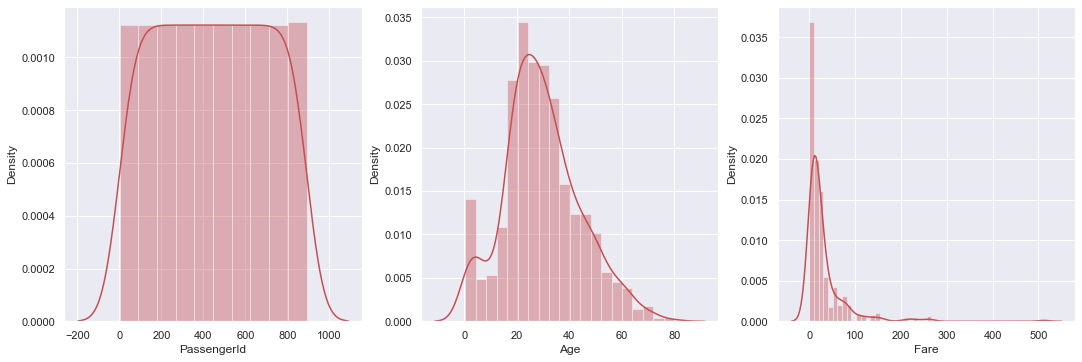

In [84]:
#Dist plot of all numberical features
# create dist plot
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()


for col, value in train_df[numerical_features].items():
    sns.distplot(value, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

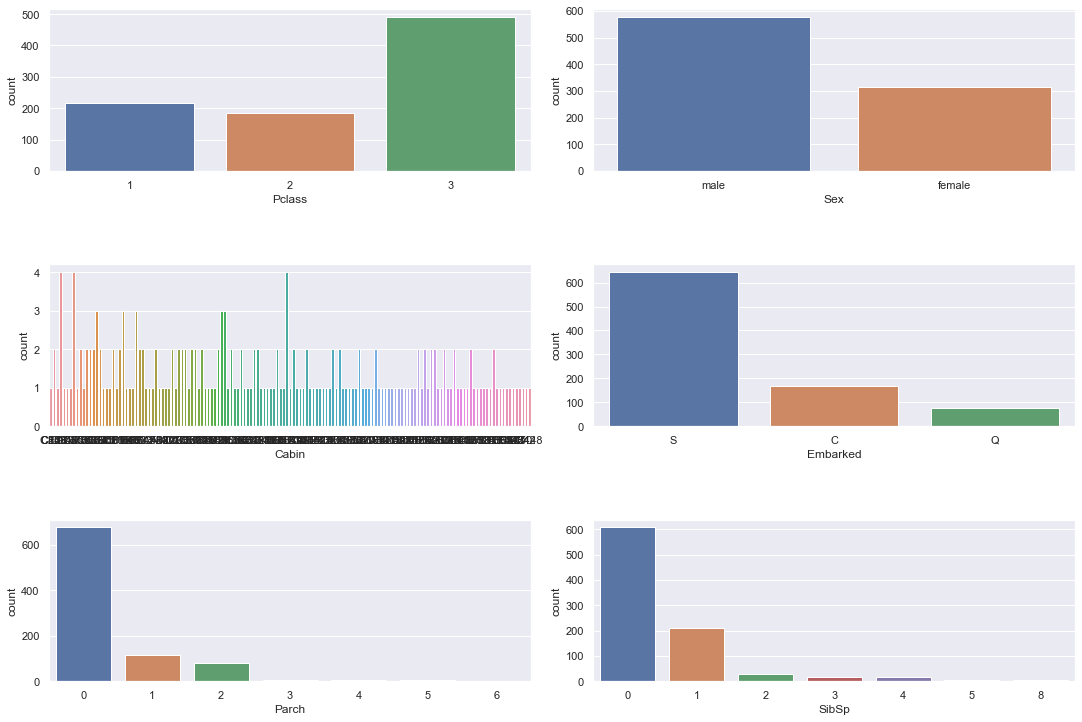

In [85]:
#Dist plot of all categorial features
# create dist plot
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(15,10))
index = 0
ax = ax.flatten()


for col in categorical_features:
    sns.countplot(x=col, data=train_df,ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:xlabel='Survived', ylabel='count'>

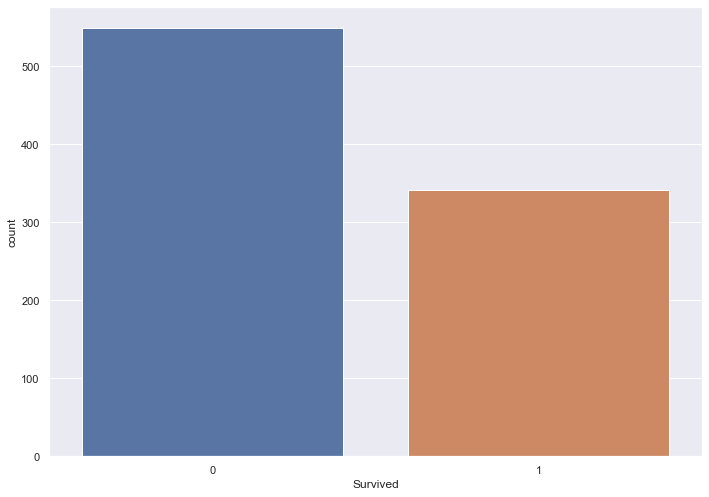

In [86]:
sns.countplot(x="Survived", data=train_df)

#### 2.2.2 Connection between features and the survival rate<a class="anchor" id="2.2.2"></a>

In [87]:
def bar_chart(feature1, feature2, categories, indexes):
    df1 = train_df[train_df[feature1]==categories[0]][feature2].value_counts()
    df2 = train_df[train_df[feature1]==categories[1]][feature2].value_counts()
    if len(categories)==3:
        df3 = train_df[train_df[feature1]==categories[2]][feature2].value_counts()
        df = pd.DataFrame([df1, df2, df3])
    else:
         df = pd.DataFrame([df1, df2])
    df.index = indexes
    df.plot(kind='bar', stacked=True, figsize=(10,5))
    

#### Classes

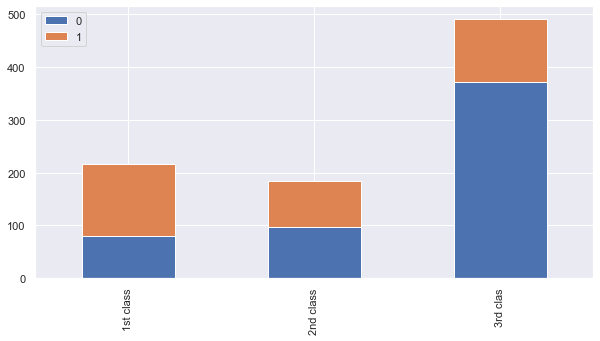

In [88]:
bar_chart('Pclass', 'Survived', [1,2,3], ['1st class', '2nd class','3rd clas'])

The Chart confirms <b>1st class passengers</b> more likely survived than <b>other classes passengers</b>.

The Chart confirms <b>3rd class</b> more likely dead than <b>other classes</b>.

#### Embarked

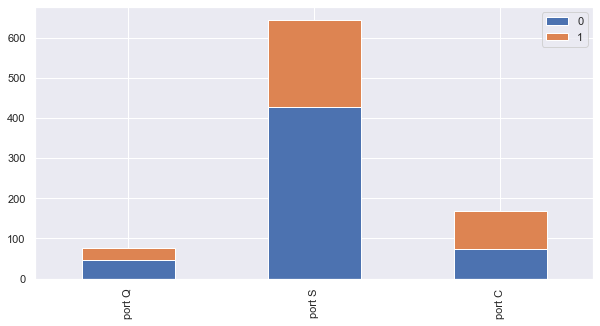

In [89]:
bar_chart('Embarked', 'Survived', ['Q', 'S', 'C'], ['port Q', 'port S','port C'])

The Chart confirms <b>passengers aborted from port Q</b> slightly more likely dead.

The Chart confirms <b>passengers aborted from port S</b> more likely dead than <b>passengers aborted from other ports</b>.

The Chart confirms <b>passengers aborted from port C</b> slightly more likely survived than <b>passengers aborted from other ports</b>.


#### Sex

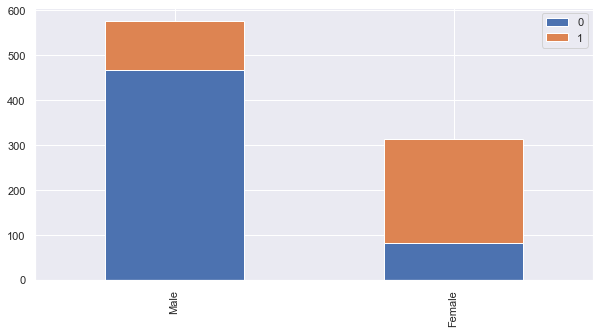

In [90]:
bar_chart('Sex', 'Survived', ['male', 'female'], ['Male', 'Female'])

The Chart confirms <b>women</b> more likely survived than <b>men</b>.

$P$(passenger survived|Passenger is woman) > $P$(passenger survived|Passenger is man) 


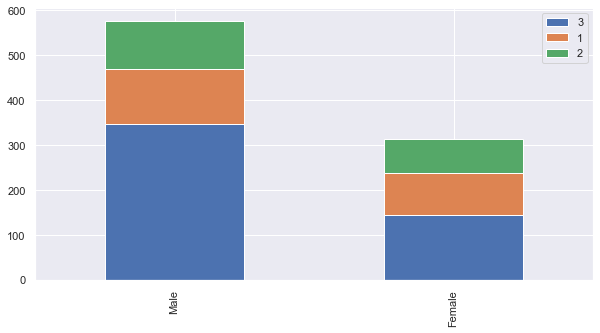

In [91]:
bar_chart('Sex', 'Pclass', ['male', 'female'], ['Male', 'Female'])

#### Age

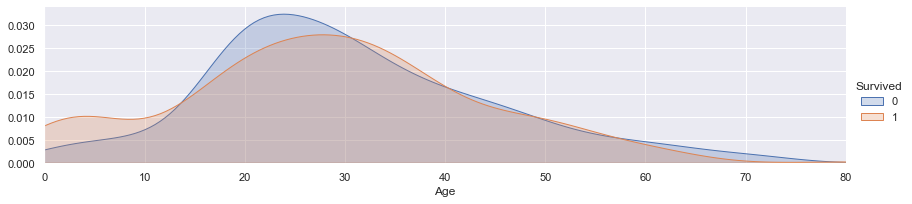

In [92]:
# How does the age relate to survival rate
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

#### Fare

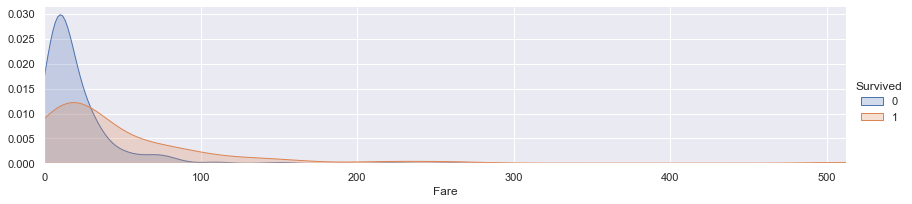

In [93]:
# How does the fare relate to survival rate
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()

#### 2.2.3 Joint distribution of features<a class="anchor" id="2.2.3"></a>

The most linear correlated features to Survival in the sinkage are:
Pclass            -->  0.34 (abs)
Fare              -->  0.26 (abs)


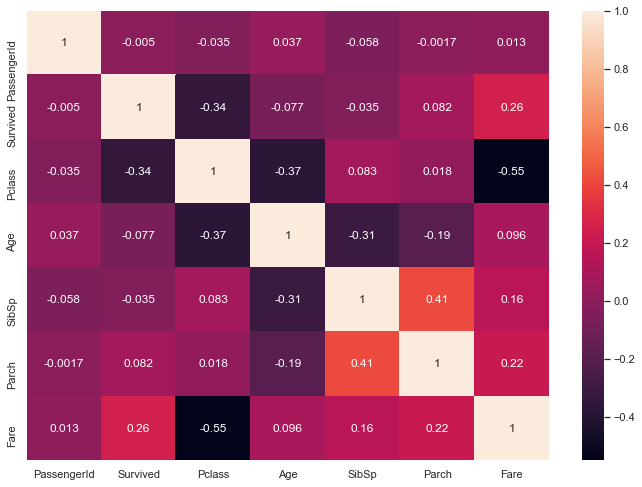

In [94]:
columns_for_corr =[col for col in train_df.columns if col != 'Pclass']
sns.heatmap(train_df.corr(), annot=True)
series = np.abs(train_df.corr()['Survived']).sort_values(ascending=False)
print('The most linear correlated features to Survival in the sinkage are:')
for i, row in enumerate(series):
    if 0.2 <= row < 1:
      print(f'{series.index[i]:17} --> {row: .2f} (abs)')

#### class and fare

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

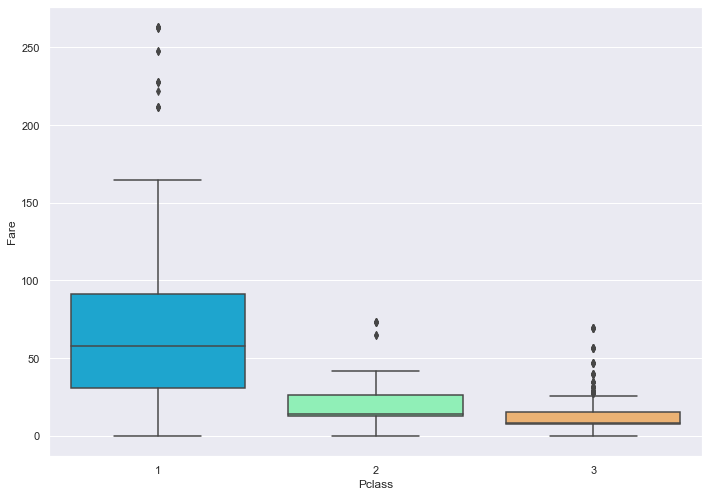

In [95]:
sns.boxplot(x='Pclass',y='Fare',data=train_df[train_df['Fare']<500], palette='rainbow')

We can see different variance between the calsses, where the 1st calss has great variance between the tickets' fare

## 3.0 Preprocessing

This is the stage of cleaning and preparing the data before running a ML algorithm.

Includes handling missing values, handling corrupt values, creating new features, etc.

### Next steps based on the data analysis

We arrive at following assumptions based on data analysis we've done so far. We may validate these assumptions further before taking appropriate actions.

#### Completing.

We may not want to complete Age feature as it is definitely correlated to survival.
We may want to complete the Embarked feature as it may also correlate with survival or another important feature.
Correcting.

#### Correcting.
1. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset. 
combinig with our domain knowledege we know it wasn't very important for survival (and also there are many cabins. will increase the number of feature and make overfitting.)
2. PassengerId may be dropped from training dataset.
3. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
4. Fare may be dropped.

#### Creating.


1. We may want to engineer the Name feature to extract Title as a new feature. (will help us to fill missing age values, as can seen below.)
2. We may want to engineer the Name feature to extract Sur name as a new feature.(??)
3.We may want to create a new feature ticker group size - will help us with determing weather the passenger travled alone.
4. We may want to create a new binaric feature is Travelled alone
(Parch + SibSp)/ ticker group size.
5. we will give up filling age missing values directly. 
crete  levels feature: is child, adult, old. 
we are going to use all the above features.


This turns a continous numerical feature into an ordinal categorical feature.



## 4. Feature creation / selection
Shoe that each new feature add value!
* Feature creation / selection, 
* Fill missing values
* Units and normalization
* Corrupt values, Abnormal values, Outliers

### 4.1 FamilySize

In [96]:
train_df['FamilySize'] = train_df['SibSp']+train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp']+test_df['Parch'] + 1
train_df[["FamilySize","Survived"]].corr()

,FamilySize,Survived
FamilySize,1.000000,0.016639
Survived,0.016639,1.000000


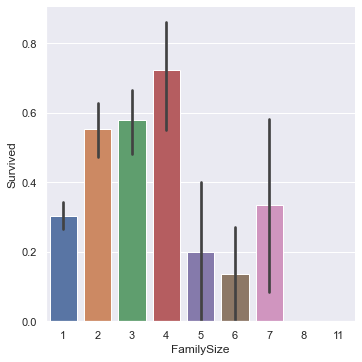

In [97]:
sns.catplot(x="FamilySize", y="Survived",  kind="bar", data=train_df)

### 4.2 Age Category
We know that crew had "women and children first" protocol for loading lifeboats. Therefore, it makes sense to assume that they had a similar protocol for elder passengers.
base on my domain knowledge, It is make sense to assume the exact age of  passenger survival. what is matter is only wether he is a child or not.

Hence forward, we will create a new feature the will overcome the missing values in the Age feature. Each sampled will be associated with one of the following categories:
1. Men
2. Women
3. Child

While the sex of the individual is known, we have to identify children from grown men or women.

#### 4.2.1 Identify childern by Age or Title

In [98]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [99]:
train_df.groupby("Title")["Age"].agg(["count","mean","max"]).sort_values("mean")

,count,mean,max
Title,,,
Master,36,4.574167,12.0
Miss,146,21.773973,63.0
Mlle,2,24.000000,24.0
Mme,1,24.000000,24.0
Ms,1,28.000000,28.0
Mr,398,32.368090,80.0
Countess,1,33.000000,33.0
Mrs,108,35.898148,63.0
Jonkheer,1,38.000000,38.0


We can see that the title of "Master" is always associated with a child.

In [100]:
def age_category(sample):
    """
    label each data point by either "Man", "Woman" or "Child".
    If the age is known and less than 12 => return child
    If the title is master => return child
    else: return the sample sex.
    """
    CHILDREN_MAX_AGE = 12
    if not np.isnan(sample["Age"]):
        if sample["Age"] < CHILDREN_MAX_AGE:
            return "Child"
        else:
            return "Woman" if sample["Sex"] == "female" else "Man"
    else: # missing value
        if sample["Title"] == "Master":
            return "Child"
        else:
            return "Woman" if sample["Sex"] == "female" else "Man"

In [101]:
train_df["age_category"] = train_df.apply(age_category,axis=1)
test_df["age_category"] = test_df.apply(age_category,axis=1)

In [102]:
train_df.groupby("age_category").size()

age_category
Child     72
Man      537
Woman    282
dtype: int64

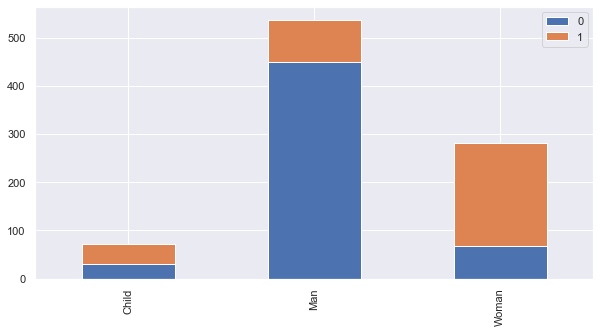

In [103]:
bar_chart('age_category', 'Survived', ["Child","Man","Woman"], ["Child","Man","Woman"])

In [104]:
# create dummy variable:
train_df = pd.get_dummies(train_df, columns=['age_category'])
test_df = pd.get_dummies(test_df, columns=['age_category'])

In [105]:
# drop the sex, title and age fields.
train_df = train_df.drop(labels=['Age','Title','Sex'], axis=1)
test_df = test_df.drop(labels=['Age','Title','Sex'], axis=1)

### 4.3 Fare

In [106]:
# fill in missing values of fare
train_df['Fare'].fillna(train_df.groupby('Pclass')["Fare"].transform('median'), inplace=True)
test_df['Fare'].fillna(train_df.groupby('Pclass')["Fare"].transform('median'), inplace=True)

### 4.4 Embarked, Pclass

Non-ordinal Categorial Features
1. Fill Embraked mising values (in train_df)
2. We will create an additional feature for each group of the categorical feature and mark each observation belonging (Value=1) or not (Value=0) to that group.


In [107]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,age_category_Child,age_category_Man,age_category_Woman
61,62,1,1,"Icard, Miss. Amelie",0,0,113572,80.0,B28,NaN,1,0,0,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,0,113572,80.0,B28,NaN,1,0,0,1


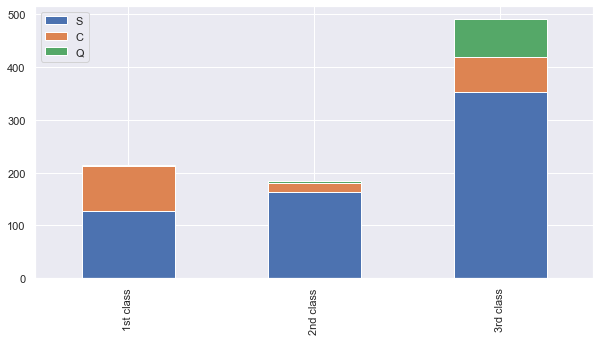

In [108]:
bar_chart('Pclass', 'Embarked', [1,2,3], ['1st class', '2nd class', '3rd class'])

for passengers from all classes, the most common Embarkation port is S.


In [109]:
train_df.loc[train_df['Embarked'].isnull(), 'Embarked'] = 'S'

In [110]:
train_df = pd.get_dummies(train_df, columns=['Pclass', 'Embarked'])
test_df = pd.get_dummies(test_df, columns=['Pclass', 'Embarked'])
train_test_list = [train_df, test_df]

### 4.5 Final Selection
drop parch, sibSp, Cabin,PassengerID

In [111]:
train_df = train_df.drop(labels=['Cabin','PassengerId','SibSp','Parch','Name','Ticket'], axis=1)
test_df = test_df.drop(labels=['Cabin','PassengerId','SibSp','Parch','Name','Ticket'], axis=1)

In [112]:
# TODO
# ## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 

# Ticket = []
# for i in list(train_df.Ticket):
#     if not i.isdigit() :
#         Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
#     else:
#         Ticket.append("X")
        
# train_df["TicketPrefix"] = Ticket
# train_df.head()
# #dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")
#train_df = train_df.drop(labels=['Ticket','TicketPrefix'], axis=1)
#test_df = test_df.drop(labels=['Ticket','TicketPrefix'], axis=1)

In [113]:
# do we have anymore missing values?
print(f'train dataset has {train_df.isnull().sum().sum()} missing values.')
print(f'test dataset has {test_df.isnull().sum().sum()} missing values.')

train dataset has 0 missing values.
test dataset has 0 missing values.


In [114]:
# remove the last category in each dummy variable:
train_df = train_df.drop(labels=['age_category_Woman','Pclass_3','Embarked_S'], axis=1)
test_df = test_df.drop(labels=['age_category_Woman','Pclass_3','Embarked_S'], axis=1)

## 5.0 Model, predict and solve
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

* Random Forrest
* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines

#### split to train and validation 

In [115]:
y = train_df["Survived"]
X = train_df.drop(labels=['Survived'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

## =============== explin CV

In [147]:
all_classifiers = {}
all_classifiers_predictions = {}

## 5.1 Random Forest

### 5.1.1 Theoritical backgroud

Tree-based methods partition the feature space into a set of rectangles, and then fit a simple model (like a constant) in each one.
We restrict our attention to recursive binary partitions trees, which are easier ro describe.
Decision-tree learners are simple to understand and to interpret, they can be visualised. can create over-complex trees that do not generalise the data well (over-fitting). Decision trees can be unstable because small variations in the data might result in a completely different tree being generated..

### 5.1.2 Fitting

In [148]:
model = RandomForestClassifier()

# search parameters:
max_depth = [1,2,3,4]
criterion = ["gini","entropy"]
min_samples_split = [2]
min_samples_leaf = [2]
bootstrap = [True]
oob_score = [True]

# the score converges to the same value as the number of estimators increases, 
# so no need to sample few values for this option
n_estimators = [100]

# define grid search
grid = dict(max_depth=max_depth,criterion=criterion,
            min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,
           bootstrap=bootstrap,oob_score=oob_score)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [149]:
# summarize results
params = pd.DataFrame(grid_result.cv_results_['params'])
params["train_mean_scocre"] = grid_result.cv_results_['mean_test_score']
params["train_std_scocre"] = grid_result.cv_results_['std_test_score']
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

params

Best: 0.825621 using {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'oob_score': True}


,bootstrap,criterion,max_depth,min_samples_leaf,min_samples_split,oob_score,train_mean_scocre,train_std_scocre
0,True,gini,1,2,2,True,0.709256,0.035200
1,True,gini,2,2,2,True,0.807222,0.046798
2,True,gini,3,2,2,True,0.813390,0.050930
3,True,gini,4,2,2,True,0.821723,0.047654
4,True,entropy,1,2,2,True,0.713738,0.032616
5,True,entropy,2,2,2,True,0.813286,0.039115
6,True,entropy,3,2,2,True,0.820621,0.043482
7,True,entropy,4,2,2,True,0.825621,0.048147


In [150]:
# choose best clf on the CV
clf = grid_result.best_estimator_
clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       oob_score=True)

In [152]:
all_classifiers["RandomForestClassifier"] = clf
all_classifiers_predictions["RandomForestClassifier"] = clf.predict(X_val)

<AxesSubplot:ylabel='Name'>

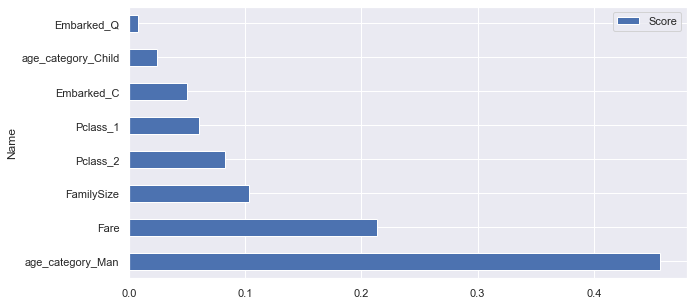

In [153]:
features_import = pd.DataFrame({'Name':X_train.columns,'Score':clf.feature_importances_ })
features_import = features_import.sort_values('Score',ascending=False)

features_import.plot(kind='barh', x='Name',y='Score',stacked=True, figsize=(10,5))

### 5.1.3 analyze results

## 5.2 Logistic regression
### 5.2.1 Theoritical backgroud
Let there X,Y.

<u>Assumptions:</u> P(Y=1|X) = Sigmoid(<$\beta$ ,X> + $\beta_0$> where $\beta\in\mathbb{R}^p,\beta_0\in\mathbb{R}$

<u>$\beta$ Estimation Strategy:</u> find $\beta$ such that $P(\bigcap_{i=1}^{n}(x_{i},y_{i}))$  is maximal (MLE).
$\iff$ minimize $\sum_{i=1}^{n}y_{i}*log(P(y_i=1|X=x_i))+(1-y_{i})*log(1-P(y_{i}=1|X=x_i))$

We minimize this <b>loss function</b> using convex optimization techniques (e.g gradient descent), NOT analytically.


<u>Mistake:</u>
I splited age column into 3 orderd bins: child, adult, senior <-> 1,2,3.
according to my assumption (which was proved by the demonstrated by the attached graph), survival chances as a function of age/age bins is not a linear function (i.e higher age -> fixed increment/decrement in survival chances).
This assumption is inconsistent with the assumptions we make on the data when we apply logistic regression.

<u>Solution:</u> Create 3 differnt dummy variables.

### 5.2.2 Fitting

In [154]:
clf = LogisticRegression(penalty='none',
                         fit_intercept=True, intercept_scaling=1, class_weight=None,max_iter = 300)
clf.fit(X_train,y_train)

predicted_train = clf.predict(X_train)

In [156]:
all_classifiers["LogisticRegression"] = clf
all_classifiers_predictions["LogisticRegression"] = clf.predict(X_val)

#### Logistic regression - subset selection
* pick only statistical significant features.
* explain what happens to the statistical significant if we put a lot of highly correlated features? (as we see here)

In [157]:
sm_model = sm.Logit(y_train, sm.add_constant(X_train.apply(stats.zscore))).fit(disp=0)
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  596
Model:                          Logit   Df Residuals:                      587
Method:                           MLE   Df Model:                            8
Date:                Thu, 04 Nov 2021   Pseudo R-squ.:                  0.3481
Time:                        20:23:14   Log-Likelihood:                -256.54
converged:                       True   LL-Null:                       -393.52
Covariance Type:            nonrobust   LLR p-value:                 1.420e-54
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7159      0.115     -6.246      0.000      -0.941      -0.491
Fare                   0.2851      0.182      1.569      0.117      -0.071       0.641
FamilySize            -0.6382      0.163     -3.909      0.000      -0.958      -0.318
age_category_Child     0.0421      0.118      0.357      0.721      -0.189       0.273
age_category_Man      -1.5143      0.131    -11.594      0.000      -1.770      -1.258
Pclass_1               0.5823      0.150      3.873      0.000       0.288       0.877
Pclass_2               0.4968      0.118      4.201      0.000       0.265       0.729
Embarked_C             0.3164      0.115      2.743      0.006       0.090       0.542
Embarked_Q             0.0709      0.114      0.621      0.535      -0.153       0.295
======================================================================================
"""

### Regularization
<u>motivation:</u> MLE, often have low bias but large variance. sometimes, by shrinking or setting some coef to 0, we might scrifice a little bit of bias but reduce the variance of the predicted values and hence may improve the overall prediction accuracy. another reason is interpetation. with large number of predictors, it may be hard to get the 'big picture'.

<u>Solution:</u> Adding a regularization term (or regularizer) 
to the loss function: $\lambda * R(f)$. 
$\lambda$ is a parameter which controls the importance of the regularization term. R(f) is chosen to impose a penalty on the complexity of f.

Popular techniques we are going to apply: 
-  $L_1$ penalty (LASSO) 
-  $L_2$ penalty (Ridge)
We will pick $\lambda$ using cross validation.

#### LASSO
R(f)= $\sum_{i=1}^{p}|\beta_{i}|$ 

$\hat{\beta} = argmin_{\beta} (Loss(\beta) + \lambda \Vert\beta\Vert_1$) or equivalently:

$\hat{\beta} = argmin_{\beta} (Loss(\beta)$), such that $\Vert\beta\Vert_1\leq t$

t*$\lambda$ = 1
remarks:
-  Lasso is a technique that penalizes large coefficients. If the variables are on different scales, the technique will tend to just penalize variables on the smallest scale as they will have the largest coefficient. Thus it is highly recommended to make sure all varibales are on the same scale. 
-  Lasso set some coefficients to 0, thus, compared to regular logistic regression, the score on train is necessarily lower.


#### Ridge

In [158]:

model = LogisticRegression()

X_train_norm = pd.DataFrame(X_train.apply(zscore))
X_val_norm = X_val.apply(zscore)


penalty = ['l1','l2']
lambdas = [0.01,0.1,0.25, 1 , 5, 10, 15, 20, 25, 30,100]
c_values = [1/lambda_value for lambda_value in lambdas]

# define grid search
grid = dict(penalty=penalty,C=c_values,solver = ['liblinear'])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_norm, y_train)


In [159]:
# summarize results
params = pd.DataFrame(grid_result.cv_results_['params'])
params["train_mean_scocre"] = grid_result.cv_results_['mean_test_score']
params["train_std_scocre"] = grid_result.cv_results_['std_test_score']
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

params.sort_values('train_mean_scocre', ascending=False)

Best: 0.825678 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


,C,penalty,solver,train_mean_scocre,train_std_scocre
10,0.100000,l1,liblinear,0.825678,0.054705
8,0.200000,l1,liblinear,0.822326,0.055849
9,0.200000,l2,liblinear,0.815593,0.054562
11,0.100000,l2,liblinear,0.815038,0.054971
6,1.000000,l1,liblinear,0.815019,0.053145
19,0.033333,l2,liblinear,0.814473,0.054040
17,0.040000,l2,liblinear,0.814473,0.054040
15,0.050000,l2,liblinear,0.814473,0.054721
1,100.000000,l2,liblinear,0.814473,0.053008
0,100.000000,l1,liblinear,0.814473,0.053008


In [160]:
# choose best clf on the CV
clf = grid_result.best_estimator_
clf.fit(X_train_norm,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [161]:
predicted = clf.predict(X_val_norm)

## Precision e Recall
recall = metrics.recall_score(y_val, predicted)
precision = metrics.precision_score(y_val, predicted)
print("Recall (probability of predicating survival if the sample survived):", round(recall,2))
print("Precision (probability of survining when predicated to survived):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_val, predicted, target_names=[str(i) for i in np.unique(y_val)]))

Recall (probability of predicating survival if the sample survived): 0.75
Precision (probability of survining when predicated to survived): 0.84
Detail:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       175
           1       0.84      0.75      0.79       120

    accuracy                           0.84       295
   macro avg       0.84      0.83      0.83       295
weighted avg       0.84      0.84      0.84       295



In [162]:
betas = pd.DataFrame({"feature":X_train_norm.columns,"beta":clf.coef_[0]})
betas.sort_values("beta", ascending=False,key=abs)

,feature,beta
3,age_category_Man,-1.262755
4,Pclass_1,0.441421
1,FamilySize,-0.389842
5,Pclass_2,0.309264
6,Embarked_C,0.209570
0,Fare,0.153261
2,age_category_Child,0.000000
7,Embarked_Q,0.000000


In [163]:
all_classifiers["LogisticRegression_REG"] = clf
all_classifiers_predictions["LogisticRegression_REG"] = clf.predict(X_val_norm)

## 5.3 SVM

### 5.3.1 Theoritical backgroud
<b>Hyperplane</b> of an n-dimensional space V is an affine subspace of dimension n − 1.

Can be represented by $\mathbf{w} \in \mathbb{R}^{n}$  such that $\mathbf{w}^{T}x + b = 0$ (orthogonal complement of a subspace span($\mathbf{w}$)) 

or equivalently as $U+v_{0}$, such that $U\subseteq V, v_0 \in \mathbb{R}^{n}$.

The signed distance of any point x to L is given by $\frac{\mathbf{w}^{T}x + b}{\| \mathbf{w} \|}$

<b>"Seperable" case - Hard-SVM</b>

Let there ($\mathbf{x}_{1}, \mathbf{y}_{1}),...,(\mathbf{x}_{n}, \mathbf{y}_{n})$ where $\mathbf{x}_{1}\in \mathbb{R}^{n}$ and $\mathbf{y}_{i}$ are either 1 or −1.
We want to find the "maximum-margin hyperplane" that divides the group of points $\mathbf{x}_{i}$ that the distance between the hyperplane and the nearest point from either group is maximized.

$\begin{aligned}
\max\limits_{\mathbf{w},b,\| \mathbf{w} \|=1} \quad & M\\
\textrm{s.t} \quad &\mathbf{y}_{i}(\mathbf{w}^{T}\mathbf{x}_{i} + b)\geq M, i=1,..,n
\end{aligned}$
 
 this optimization problem is equivalent to the convex problem:
 
$\begin{aligned}
\min\limits_{\mathbf{w},b} \quad & \frac{1}{2}{\| \mathbf{w} \|}^2\\
\textrm{s.t} \quad &\mathbf{y}_{i}(\mathbf{w}^{T}\mathbf{x}_{i} + b)\geq 1, i=1,..,n
\end{aligned}$


<b>Soft-SVM:</b>

Extension of SVM to cases in which data is not lineary seperable.

Let's define the hinge loss function:

$\max(0, 1-\mathbf{y}_{i}(\mathbf{w}^T\mathbf{x}_{i})+b)$

The goal of the optimization then is to minimize

$\begin{aligned}
\min\limits_{\mathbf{w},b} \quad \| \mathbf{w} \|^{2} + \lambda [\frac{1}{n}\sum_{i=1}^{n}
\max(0, 1-\mathbf{y}_{i}(\mathbf{w}^T\mathbf{x}_{i})+b)]\end{aligned}$


where the parameter 
$\lambda$ determines the trade-off between increasing the margin size and ensuring that the 
$\mathbf{x} _{i}$ lie on the correct side of the margin.

### 5.3.2 Fitting

Our data is not lineary seperable.

In [164]:

model = SVC()
lambdas = [0.01,0.1,0.25, 1 , 5, 10, 15, 20, 25, 30]
c_values = [1/lambda_value for lambda_value in lambdas]

# define grid search
grid = [{'C':c_values, 'kernel':['linear']}]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [165]:
# summarize results
params = pd.DataFrame(grid_result.cv_results_['params'])
params["train_mean_scocre"] = grid_result.cv_results_['mean_test_score']
params["train_std_scocre"] = grid_result.cv_results_['std_test_score']
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

params.sort_values('train_mean_scocre', ascending=False)

Best: 0.821770 using {'C': 100.0, 'kernel': 'linear'}


,C,kernel,train_mean_scocre,train_std_scocre
0,100.000000,linear,0.821770,0.053964
1,10.000000,linear,0.820104,0.055365
2,4.000000,linear,0.819539,0.055687
3,1.000000,linear,0.818409,0.054406
9,0.033333,linear,0.816742,0.058020
4,0.200000,linear,0.809482,0.055934
8,0.040000,linear,0.806685,0.058573
7,0.050000,linear,0.805556,0.057936
5,0.100000,linear,0.804463,0.058611
6,0.066667,linear,0.803898,0.058928


In [166]:
# choose best clf on the CV
clf = grid_result.best_estimator_
clf.fit(X_train,y_train)
all_classifiers["SVM"] = clf
all_classifiers_predictions["SVM"] = clf.predict(X_val)

## 5.4 KNN
### 5.4.1 Theoritical backgroud
Given a query point $\mathbf{x}_0$, we choose distance metrics for our feture space, and find the k training points $\mathbf{x}_{r}$,r = 1,...,k closest in distance to $\mathbf{x}_0$, and then classify using majority vote among the k neighbors.

<b>NOTE:</b> first, It is important to standardize each of the features to have mean zero and variance 1, since it is possible that they are measured in different units.

Because it uses only the training point closest to the query point, the bias of the 1-nearest-neighbor estimate is often low, but the variance is high.

### 5.4.2 Fitting

In [167]:
#data is sparse so i need to pick a different metric.

model = KNeighborsClassifier()
n_neighbors = [5,10,15,20,24]

X_train_norm = pd.DataFrame(X_train.apply(zscore))
X_val_norm = X_val.apply(zscore)

# define grid search
grid = [{'n_neighbors':n_neighbors}]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_norm, y_train)

In [168]:
# summarize results
params = pd.DataFrame(grid_result.cv_results_['params'])
params["train_mean_scocre"] = grid_result.cv_results_['mean_test_score']
params["train_std_scocre"] = grid_result.cv_results_['std_test_score']
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

params.sort_values('train_mean_scocre', ascending=False)

Best: 0.814435 using {'n_neighbors': 24}


,n_neighbors,train_mean_scocre,train_std_scocre
4,24,0.814435,0.043958
3,20,0.813277,0.048251
0,5,0.807627,0.055592
2,15,0.803220,0.042146
1,10,0.803183,0.045452


In [200]:
clf = grid_result.best_estimator_
clf.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=24)

In [201]:
# choose best clf on the CV
clf = grid_result.best_estimator_
clf.fit(X_train_norm,y_train)
all_classifiers["KNN"] = clf
all_classifiers_predictions["KNN"] = clf.predict(X_val_norm)

## 5.5 Analyze all models

In [202]:
res = []
for model in all_classifiers_predictions:
    pred = all_classifiers_predictions[model]
    res.append([model, metrics.accuracy_score(y_val, pred),
                metrics.recall_score(y_val, pred),
                metrics.precision_score(y_val, pred)])
res = pd.DataFrame(res, columns = ["model", "val_accuracy","val_recall","val_precision"]).sort_values("val_accuracy",ascending=False)
res

,model,val_accuracy,val_recall,val_precision
3,SVM,0.844068,0.766667,0.836364
2,LogisticRegression_REG,0.840678,0.750000,0.841121
1,LogisticRegression,0.837288,0.766667,0.821429
0,RandomForestClassifier,0.827119,0.733333,0.822430
4,KNN,0.803390,0.600000,0.878049


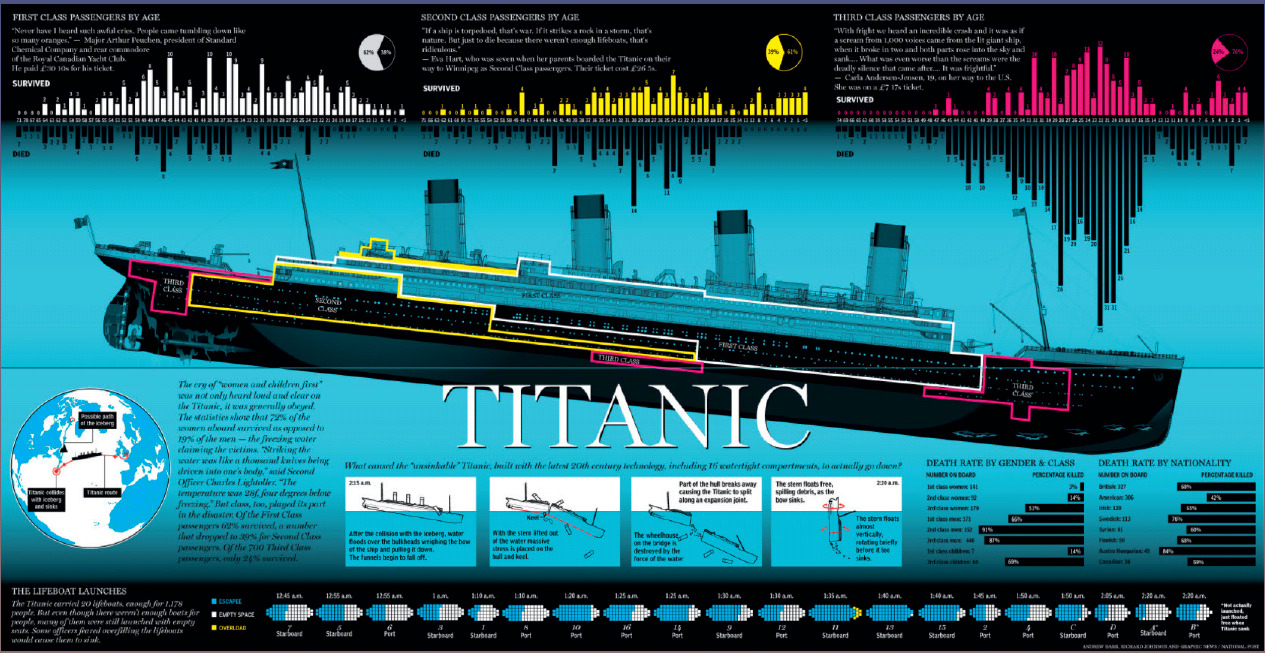

In [186]:
from IPython.display import Image
Image("./Desktop/Data Science/Titanic Project/titanic infographics.jpeg")

This is a diagram of the Titanic. 
It sank from right to left. Thus, we expect to see  higher death rate in cabins which located closer to where the Titanic hit the iceberg.
It will be more dominant in class 3

In [ ]:
import numpy as np

def sigmoid(x):  
    return np.exp(-np.logaddexp(0, -x))

In [ ]:
N=100000
X1 = np.random.standard_normal(N)
epsilon = np.random.normal(0, 0.001, N)
X2 = [X1[i] + epsilon[i] for i in range(N)]
X = np.stack([X2,X1], axis=1)

In [ ]:
Y = 3*X1


In [ ]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X,Y)

In [ ]:
clf.coef_
#clf.intercept_

In [ ]:
X.corr()

In [ ]:
np.corrcoef(X.T)

questions:
1) Where am I on the scale: high training loss + high test loss -> under fitting, low training loss + high test loss -> over fitting
2) dist of my errors. I.e do I have more errors in predicting survival? 

In [ ]:
X_train = train[subset_columns]
sm_model = sm.Logit(Y_train, sm.add_constant(X_train)).fit(disp=0)
sm_model.summary()
Y_val.shape
pred = pd.DataFrame({"Y":Y_train, "LR":predicted_tain_lr, "RF":predicted_tain_rf})